2.4 Exercises
Conceptual

1. For each of parts (a) through (d), indicate whether we would generally
expect the performance of a flexible statistical learning method to be
better or worse than an inflexible method. Justify your answer.

(a) The sample size n is extremely large, and the number of predic-
tors p is small.

(b) The number of predictors p is extremely large, and the number
of observations n is small.

(c) The relationship between the predictors and response is highly
non-linear.

(d) The variance of the error terms, i.e. σ2 = Var("), is extremely
high.

9. This exercise involves the Auto data set studied in the lab. Make sure
that the missing values have been removed from the data.

(a) Which of the predictors are quantitative, and which are quali-
tative?

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.float_format = '{:,.2f}'.format

Auto = pd.read_csv("C:/Source/AI och Maskinlära 2024 YH/statistiska_metoder/ALL CSV FILES - 2nd Edition/Auto.csv")
Auto.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           397 non-null    float64
 1   cylinders     397 non-null    int64  
 2   displacement  397 non-null    float64
 3   horsepower    397 non-null    object 
 4   weight        397 non-null    int64  
 5   acceleration  397 non-null    float64
 6   year          397 non-null    int64  
 7   origin        397 non-null    int64  
 8   name          397 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.0+ KB


In [42]:
# 0 non_null

Auto

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.00,8,307.00,130,3504,12.00,70,1,chevrolet chevelle malibu
1,15.00,8,350.00,165,3693,11.50,70,1,buick skylark 320
2,18.00,8,318.00,150,3436,11.00,70,1,plymouth satellite
3,16.00,8,304.00,150,3433,12.00,70,1,amc rebel sst
4,17.00,8,302.00,140,3449,10.50,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
392,27.00,4,140.00,86,2790,15.60,82,1,ford mustang gl
393,44.00,4,97.00,52,2130,24.60,82,2,vw pickup
394,32.00,4,135.00,84,2295,11.60,82,1,dodge rampage
395,28.00,4,120.00,79,2625,18.60,82,1,ford ranger


In [43]:
# horsepower column seems to be object not numeric datatype it needs to be inspected

Auto.horsepower.unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In [44]:
# seems to have non numeric value as ?

# Time to overwrite the dataframe without rows which include horsepower with value ?
Auto = Auto[Auto.horsepower != "?"].copy()
# converting the horsepower column to numeric now it does only have digits as values on each row
Auto["horsepower"] = pd.to_numeric(Auto["horsepower"])
Auto.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 396
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    int64  
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   year          392 non-null    int64  
 7   origin        392 non-null    int64  
 8   name          392 non-null    object 
dtypes: float64(3), int64(5), object(1)
memory usage: 30.6+ KB


In [45]:
# horsepower is now int64 so numeric so data has no missing values
Auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.00,8,307.00,130,3504,12.00,70,1,chevrolet chevelle malibu
1,15.00,8,350.00,165,3693,11.50,70,1,buick skylark 320
2,18.00,8,318.00,150,3436,11.00,70,1,plymouth satellite
3,16.00,8,304.00,150,3433,12.00,70,1,amc rebel sst
4,17.00,8,302.00,140,3449,10.50,70,1,ford torino


In [46]:
# Quantative predictors, by selecting types which are numeric
quantitative_columns = Auto.select_dtypes(include=["number"]).columns
quantitative_columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'year', 'origin'],
      dtype='object')

In [47]:
# It seems mpg, cylinders, displacement, horsepower, weight, acceleration and year is quantative

In [48]:
# Qualitative predictors, by selecting types which are non numeric
qualitative_columns = Auto.select_dtypes(exclude=["number"]).columns
qualitative_columns

Index(['name'], dtype='object')

In [49]:
# It seems name is qualitative

(b) What is the range of each quantitative predictor? You can an-
swer this using the min() and max() methods in numpy. .min()
.max()

In [50]:
# describing the dataframes numeric different values in their catagories 
auto_range = Auto.describe()

# creating new row called range
auto_range.loc["range"] = auto_range.loc["max"] - auto_range.loc["min"]

# showing the values for each column in range row
auto_range.loc["range"]

mpg               37.60
cylinders          5.00
displacement     387.00
horsepower       184.00
weight         3,527.00
acceleration      16.80
year              12.00
origin             2.00
Name: range, dtype: float64

(c) What is the mean and standard deviation of each quantitative
predictor?

In [51]:
# showing only rows with mean and standard deviation
auto_range.loc[["mean","std"]]

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mean,23.45,5.47,194.41,104.47,"2,977.58",15.54,75.98,1.58
std,7.81,1.71,104.64,38.49,849.40,2.76,3.68,0.81


(d) Now remove the 10th through 85th observations. What is the
range, mean, and standard deviation of each predictor in the
subset of the data that remains?

In [52]:
# droping the rows from 10 to 85. index 0 is first. so index 9 and 84 is 10th and 85th
Auto_sliced_off = Auto.drop(Auto.index[9:84])
Auto_sliced_off = Auto_sliced_off.describe()
Auto_sliced_off.loc["range"] = Auto_sliced_off.loc["max"] - Auto_sliced_off.loc["min"]
Auto_sliced_off.loc[["mean","std", "range"]]

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mean,24.37,5.38,187.75,100.96,"2,939.64",15.72,77.13,1.60
std,7.88,1.66,99.94,35.90,812.65,2.69,3.11,0.82
range,35.60,5.00,387.00,184.00,"3,348.00",16.30,12.00,2.00


(e) Using the full data set, investigate the predictors graphically,
using scatterplots or other tools of your choice. Create some plots
highlighting the relationships among the predictors. Comment
on your findings.

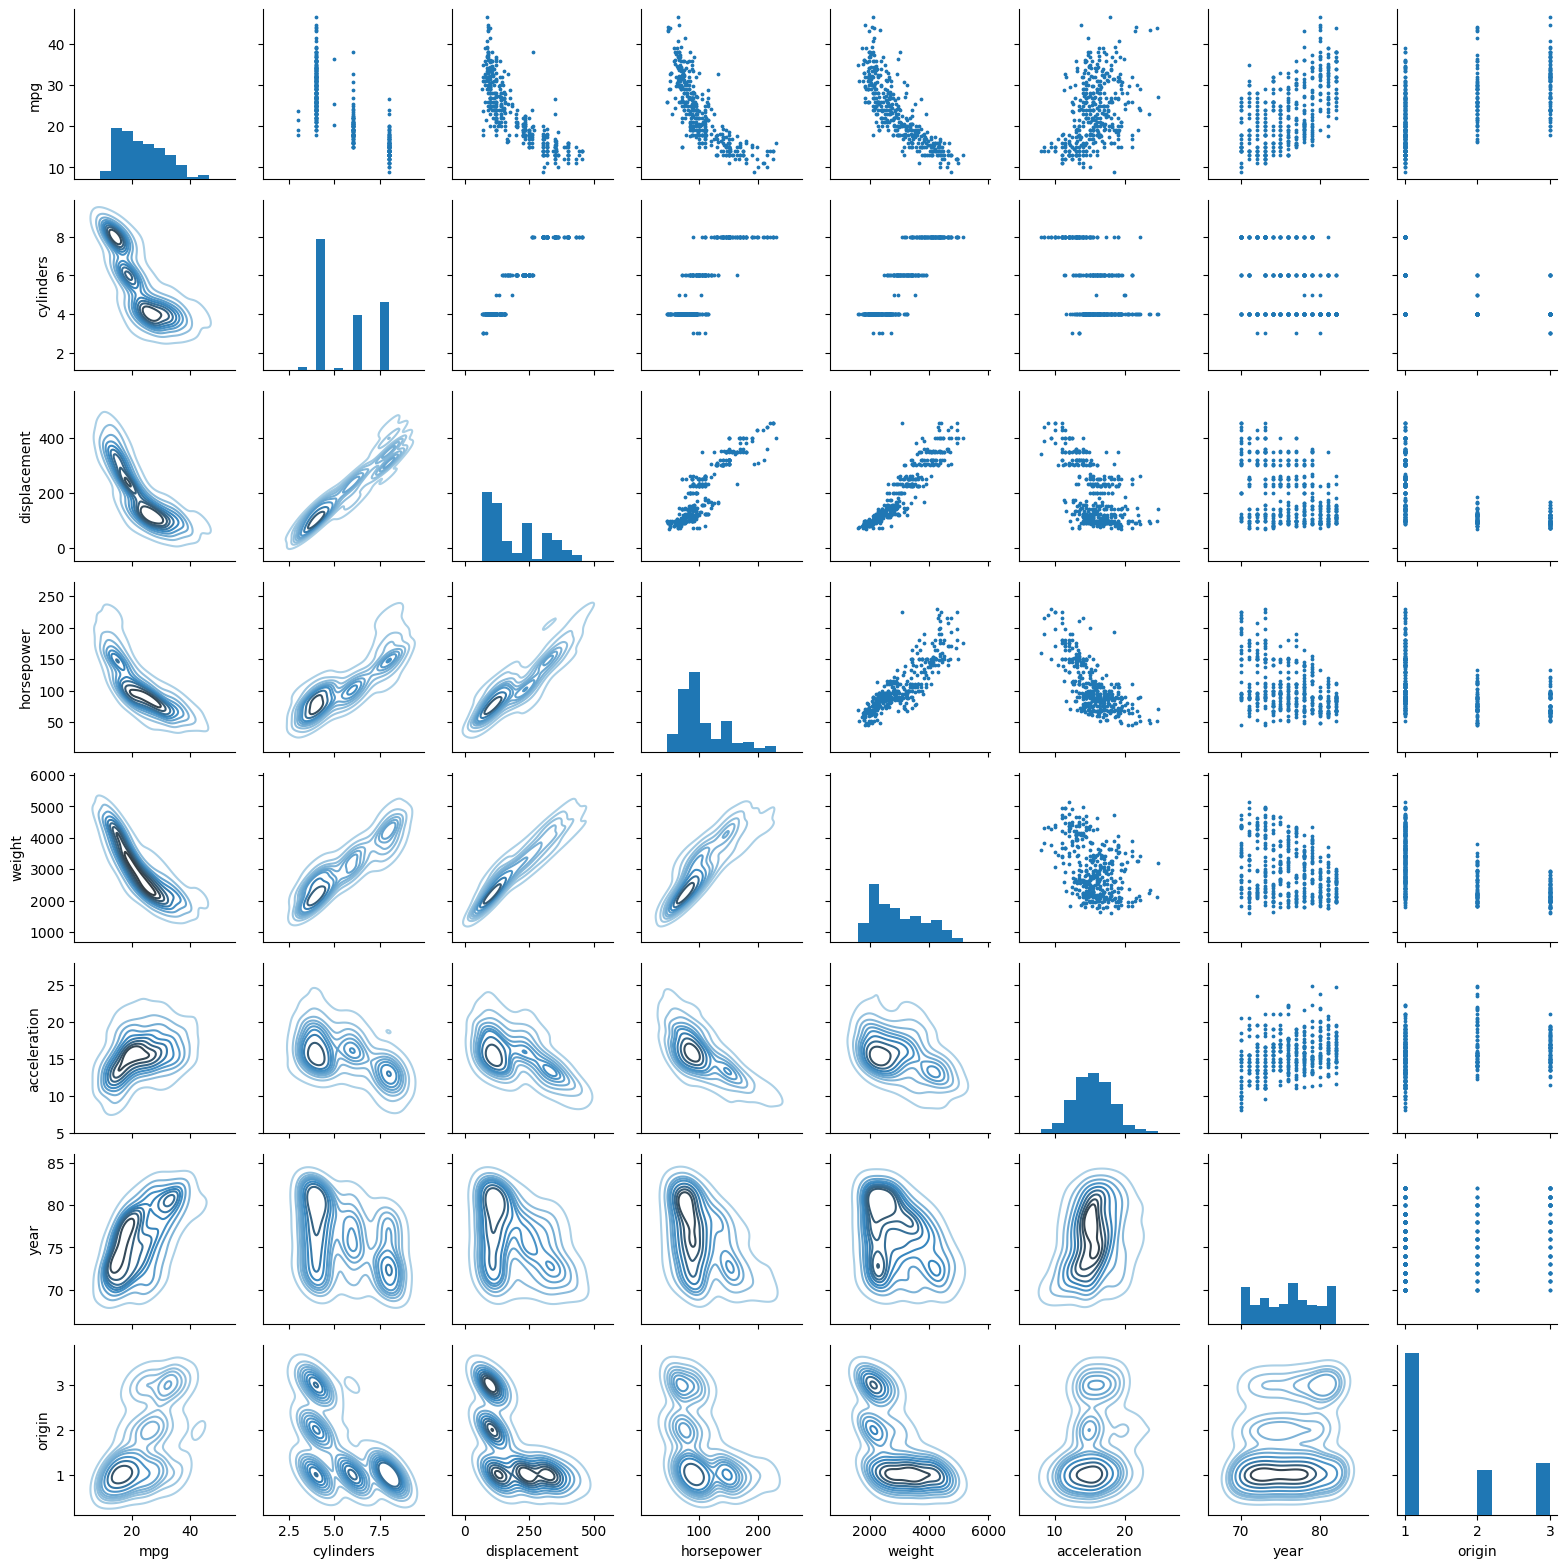

In [54]:
g = sns.PairGrid(Auto, height=2)
g.map_upper(plt.scatter, s=3)
g.map_diag(plt.hist)
g.map_lower(sns.kdeplot, cmap="Blues_d")
g


(f) Suppose that we wish to predict gas mileage (mpg) on the basis
of the other variables. Do your plots suggest that any of the
other variables might be useful in predicting mpg? Justify your
answer.

10. This exercise involves the Boston housing data set.

(a) To begin, load in the Boston data set, which is part of the ISLP
library.



(b) How many rows are in this data set? How many columns? What
do the rows and columns represent?


(c) Make some pairwise scatterplots of the predictors (columns) in
this data set. Describe your findings.

(d) Are any of the predictors associated with per capita crime rate?
If so, explain the relationship.

(e) Do any of the suburbs of Boston appear to have particularly
high crime rates? Tax rates? Pupil-teacher ratios? Comment on
the range of each predictor.


(f) How many of the suburbs in this data set bound the Charles
river?

(g) What is the median pupil-teacher ratio among the towns in this
data set?

(h) Which suburb of Boston has lowest median value of owner-
occupied homes? What are the values of the other predictors
for that suburb, and how do those values compare to the overall
ranges for those predictors? Comment on your findings.

(i) In this data set, how many of the suburbs average more than
seven rooms per dwelling? More than eight rooms per dwelling?
Comment on the suburbs that average more than eight rooms
per dwelling.